In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
color = sb.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [53]:
default = pd.read_csv("Default.csv")
default1 = default
default1.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [17]:
default1.shape
default.tail()

,Unnamed: 0,default,student,balance,income
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365
9999,10000,No,Yes,200.922183,16862.952321


In [18]:
type(default1)

pandas.core.frame.DataFrame

In [56]:
default1 = default1.drop(labels="Unnamed: 0", axis = 1, inplace = False)

In [57]:
default1.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [21]:
type(default1)

pandas.core.series.Series

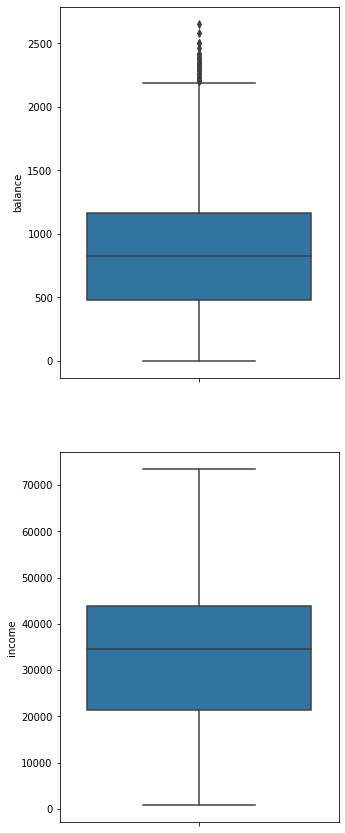

In [36]:
plt.figure(figsize = (5,15))
plt.subplot(2,1,1)
sb.boxplot(y = default1['balance'])
plt.subplot(2,1,2)
sb.boxplot(y = default1['income'])

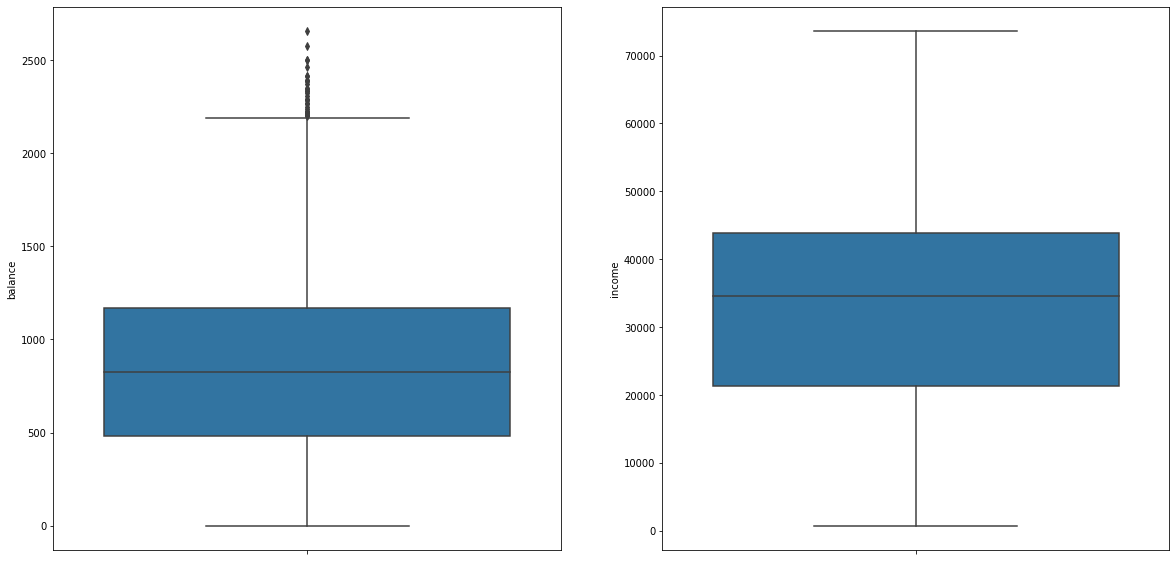

In [37]:
# plotting box plots for the numerical variables
plt.figure(figsize = (20,10)) # defining the size of the full plots picture
plt.subplot(1,2,1) # defining the (no of rows, no of columns, index number of plot to be defined below this)
sb.boxplot(y = default1['balance'])
plt.subplot(1,2,2)
sb.boxplot(y = default1['income'])

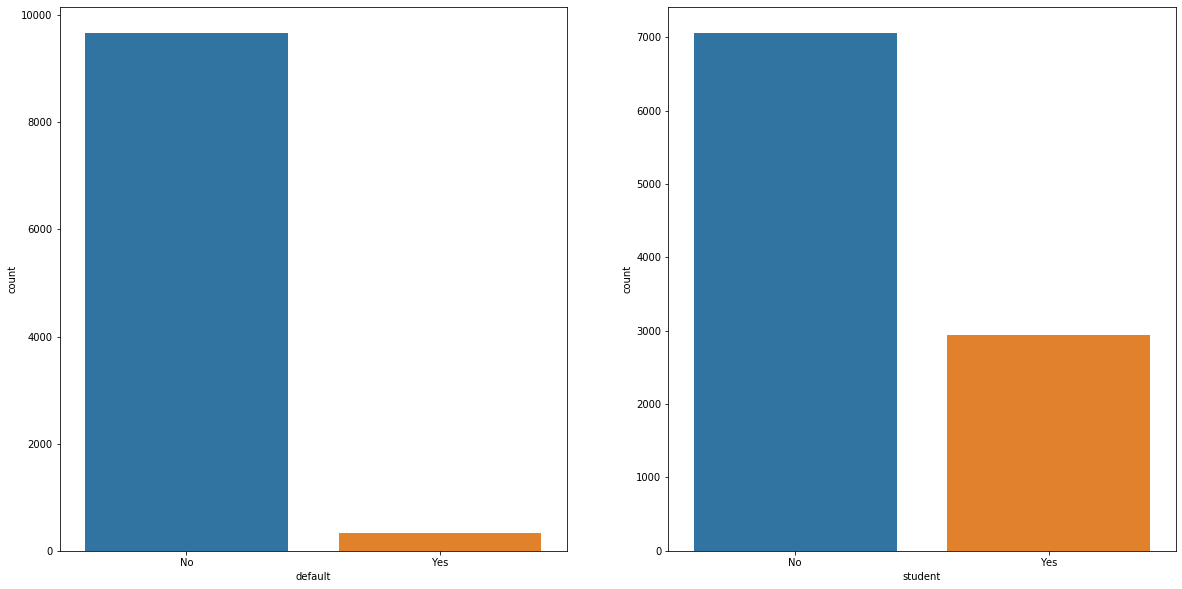

In [38]:
# plotting the categorical variables
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sb.countplot(default1['default'])
plt.subplot(1,2,2)
sb.countplot(default1['student'])
plt.show()

In [39]:
# to calculate the frquency in categorical variables
default1['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [41]:
default1['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [44]:
# to know the percentages from the value counts , we include the attribute normalize = True
default1['student'].value_counts(normalize = True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [45]:
default1['default'].value_counts(normalize = True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

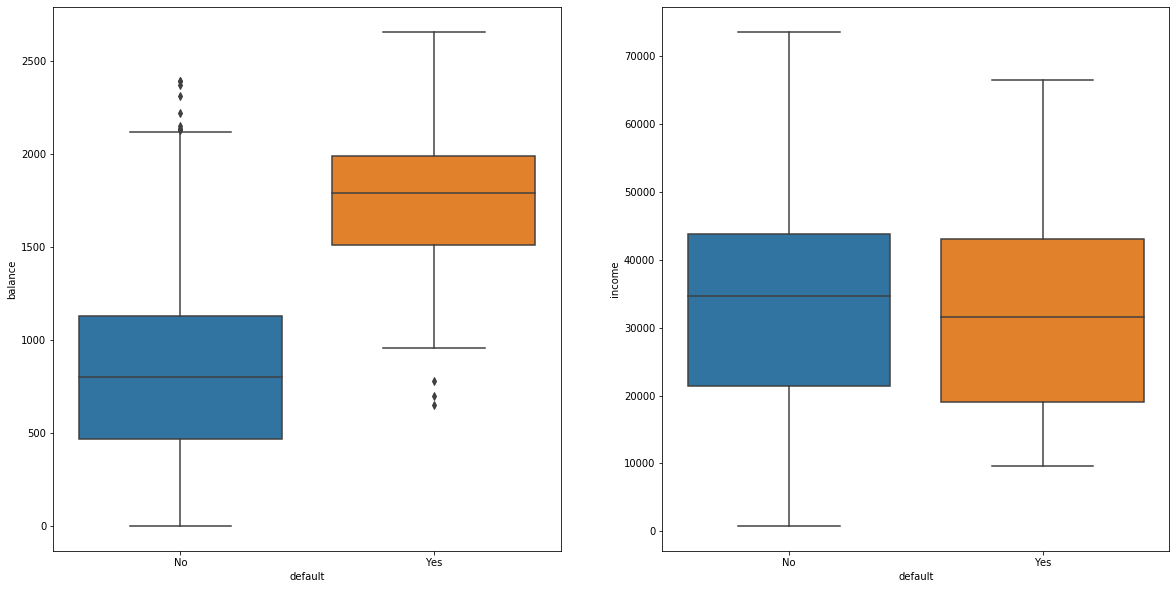

In [46]:
# plotting categrical and numerical variables
# using boxplot of seaborn

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sb.boxplot(default1['default'],default1['balance'])
plt.subplot(1,2,2)
sb.boxplot(default1['default'],default['income'])


In [47]:
# create a subpivot table for two categorical variables 
pd.crosstab(default1['student'],default1['default'], normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


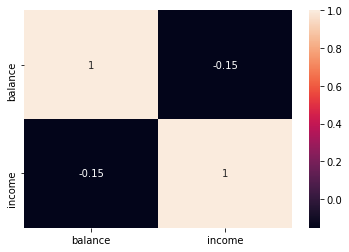

In [49]:
sb.heatmap(default1[['balance','income']].corr(), annot = True)

In [58]:
# to count the number of empty  or null cells
default1.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [62]:
# Delving into more EDA, lets calculate the quartiles in loan balance and see how these interact with the default variable
Q3, Q1 = default1['balance'].quantile([.75, .25])
IQR = Q3 -Q1
LL = Q1 - (1.5*IQR)
UL = Q3 + (1.5* IQR)
print(LL, UL)

-545.1348170774593 2193.1743086078145


In [72]:
# So we can use these limits to see how many people with balances are outside the limits

ldf = default1[default1['balance'] < LL]
udf = default1[default1['balance'] > UL]

udf.head()

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492253
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519752
1359,Yes,No,2220.966201,40725.096207
1502,Yes,Yes,2332.878254,11770.234124


In [73]:
ldf.head()

,default,student,balance,income


In [75]:
udf.shape

(31, 4)

In [79]:
# to check the number of people who defaulted in the udf range
print(udf['default'].value_counts())
# we see that 26 defaulted out of 31 in this range. So it points to people with really high balances defaulting more often 

Yes    26
No      5
Name: default, dtype: int64


In [81]:
print(udf['default'].value_counts(normalize = True))

Yes    0.83871
No     0.16129
Name: default, dtype: float64


In [83]:
26/333

0.07807807807807808

#### in an attempt to treat people with loan balances in the udf outliers set, instead of deleting these observations, we can attempt to set their loan balances to the UL 

In [90]:
# using the np.where function (it sort of replicates the IF statement in excel)
default1['balance_new'] = np.where(default1['balance'] > UL, UL, default1['balance'])
default1.head()

,default,student,balance,income,balance_new
0,No,No,729.526495,44361.625074,729.526495
1,No,Yes,817.180407,12106.134700,817.180407
2,No,No,1073.549164,31767.138947,1073.549164
3,No,No,529.250605,35704.493935,529.250605
4,No,No,785.655883,38463.495879,785.655883


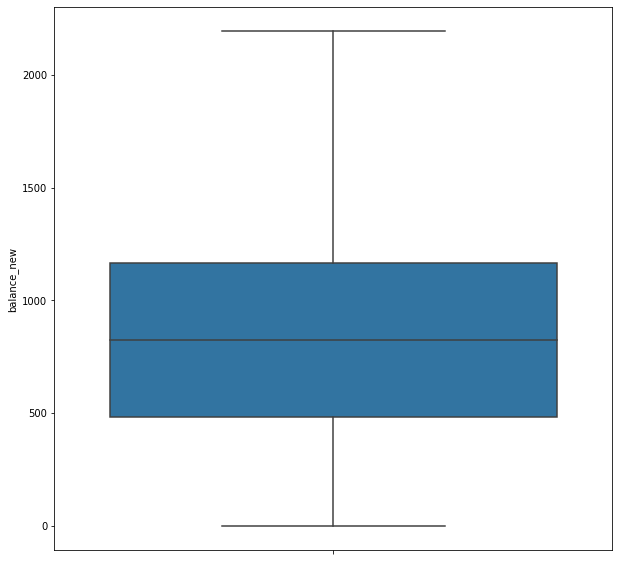

In [98]:
plt.figure(figsize = (10,10))
sb.boxplot(y = default1['balance_new'])

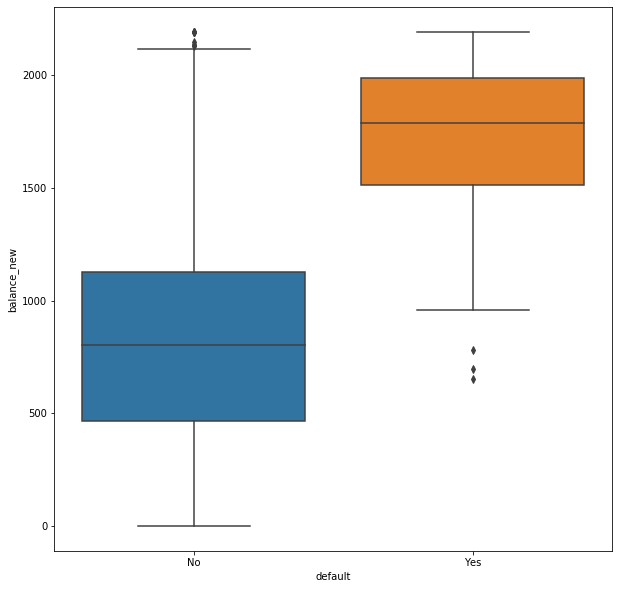

In [99]:
plt.figure(figsize = (10,10))
sb.boxplot(x = default1['default'], y = default1['balance_new'])

In [105]:
defdf = default1[default1['default'] == 'No']

In [109]:
defdf.head()

,default,student,balance,income,balance_new
0,No,No,729.526495,44361.625074,729.526495
1,No,Yes,817.180407,12106.134700,817.180407
2,No,No,1073.549164,31767.138947,1073.549164
3,No,No,529.250605,35704.493935,529.250605
4,No,No,785.655883,38463.495879,785.655883


In [110]:
defdf.shape

(9667, 5)

In [112]:
print(defdf['default'].count())

9667


In [114]:
Q3, Q1 = defdf['balance'].quantile([.75, .25])

In [146]:
IQR = Q3 - Q1
NoDefUL = Q3 + (IQR*1.5)
NoDefUL

2704.757940023347

In [136]:
subdefdf = defdf[defdf['balance'] > NoDefUL]

In [138]:
subdefdf.head()

,default,student,balance,income,balance_new
2140,No,Yes,2308.893236,19110.266412,2193.174309
2519,No,Yes,2134.015627,17897.646613,2134.015627
3702,No,Yes,2370.463612,24251.958722,2193.174309
3976,No,Yes,2388.174009,7832.135644,2193.174309
4363,No,Yes,2128.434148,22664.219844,2128.434148


In [140]:
subdefdf.shape

(9, 5)

In [139]:
print(subdefdf.round(2))

     default student  balance    income  balance_new
2140      No     Yes  2308.89  19110.27      2193.17
2519      No     Yes  2134.02  17897.65      2134.02
3702      No     Yes  2370.46  24251.96      2193.17
3976      No     Yes  2388.17   7832.14      2193.17
4363      No     Yes  2128.43  22664.22      2128.43
4831      No     Yes  2216.33  24737.08      2193.17
8697      No     Yes  2133.75  19675.51      2133.75
8781      No     Yes  2149.34  15093.83      2149.34
9873      No      No  2391.01  50302.91      2193.17


In [130]:
ndfdf = default1[default1['default'] == 'Yes']

In [131]:
ndfdf.head()

,default,student,balance,income,balance_new
136,Yes,Yes,1486.998122,17854.397028,1486.998122
173,Yes,Yes,2205.799521,14271.492253,2193.174309
201,Yes,Yes,1774.694223,20359.506086,1774.694223
206,Yes,No,1889.599190,48956.171589,1889.599190
209,Yes,Yes,1899.390626,20655.200003,1899.390626


In [132]:
ndfdf.shape

(333, 5)

In [134]:
Q3, Q1 = ndfdf['balance'].quantile([.75, .25])

In [135]:
IQR = Q3 - Q1
ndfUL = Q3 + (IQR*1.5)

In [147]:
subndfdf = ndfdf[ndfdf['balance'] > ndfUL]
print(subndfdf)

Empty DataFrame
Columns: [default, student, balance, income, balance_new]
Index: []


In [152]:
ndfLL = Q1 - (IQR*1.5)
subndfdf2 = ndfdf[ndfdf['balance'] < ndfLL]
print(subndfdf2)

     default student     balance        income  balance_new
651      Yes      No  780.172569  51656.874064   780.172569
4159     Yes      No  698.567352  31754.523422   698.567352
9538     Yes      No  652.397134  46155.043868   652.397134


In [153]:
subndfdf2.describe()

,balance,income,balance_new
count,3.000000,3.000000,3.000000
mean,710.379019,43188.813784,710.379019
std,64.701445,10277.391739,64.701445
min,652.397134,31754.523422,652.397134
25%,675.482243,38954.783645,675.482243
50%,698.567352,46155.043868,698.567352
75%,739.369961,48905.958966,739.369961
max,780.172569,51656.874064,780.172569


In [154]:
default1 = pd.get_dummies(default1, drop_first = True)